<a href="https://colab.research.google.com/github/eudesz/AnyoneAI_Group_2/blob/main/S01W02_Stats_%26_Data_Visualization_Eudes_Benitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]

%matplotlib inline

In [ ]:
!nvidia-smi

Mon Jul  4 20:50:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Uniform distribution

In [ ]:
# Simulate rolling a die
die_faces = [1,2,3,4,5,6]

# Let's create a random generator. The `seed` value 
# is a number used to initialize a pseudorandom number
# generator. It will allow us to get reproducible results
# if we want to run the experiment again.
rng = np.random.RandomState(seed=1)

In [ ]:
rng.choice?

In [ ]:
# Randomly choice one of the die faces
choice = rng.choice(die_faces, size=1)
choice

array([6])

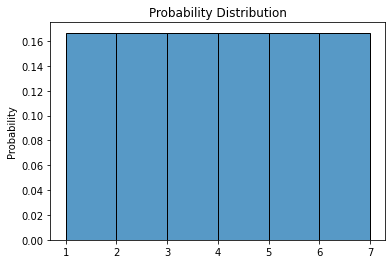

In [ ]:
# Probability distribution for a die
sns.histplot([1,2,3,4,5,6], bins=list(range(1,8)), stat='probability').set_title(f'Probability Distribution')
plt.show()

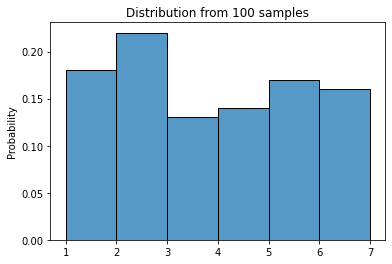

In [ ]:
# Empirical distribution from 100 samples
rng = np.random.RandomState(seed=1)
num_samples = 100
x = rng.choice([1,2,3,4,5,6], num_samples)
sns.histplot(x, bins=list(range(1,8)), stat='probability').set_title(f'Distribution from {num_samples} samples')
plt.show()

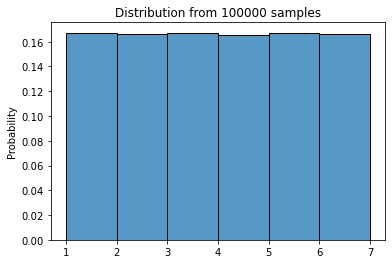

In [ ]:
# Empirical distribution from 100000 samples
rng = np.random.RandomState(seed=1)
num_samples = 100000
x = rng.choice([1,2,3,4,5,6], num_samples)
sns.histplot(x, bins=list(range(1,8)), stat='probability').set_title(f'Distribution from {num_samples} samples')
plt.show()

## Descriptive Statistics

### Mean, Median

In [ ]:
# People age in this class
people_age = [29, 26, 25, 31, 71]

In [ ]:
np.mean(people_age)

36.4

In [ ]:
np.median(people_age)

29.0

## Data Visualization

In [ ]:
hp = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/house-prices.csv')
hp

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


### Bar plots

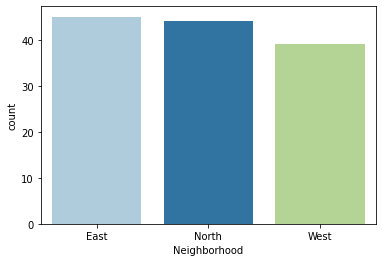

In [ ]:
# You can find all the available color palettes at https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig = sns.countplot(data=hp, x='Neighborhood', palette='Paired')
# plt.show()

In [ ]:
sns.kdeplot?

In [ ]:
fig.

AxesSubplot(0.125,0.125;0.775x0.755)


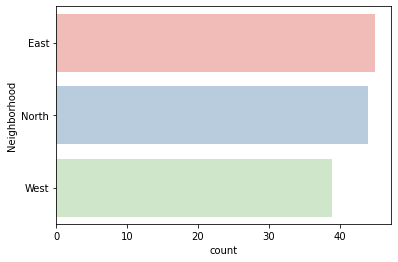

In [ ]:
# If you want to plot horizontally
sns.countplot(data=hp, y='Neighborhood', palette='Pastel1')
plt.show()

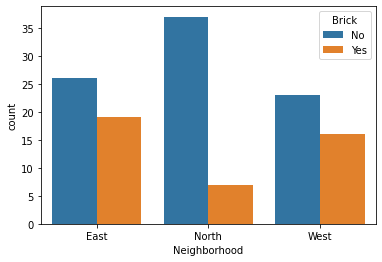

In [ ]:
# Plot value counts grouped by a second variable
sns.countplot(data=hp, x='Neighborhood', hue='Brick')
plt.show()

### Analyze Distribution with Histogram and KDE

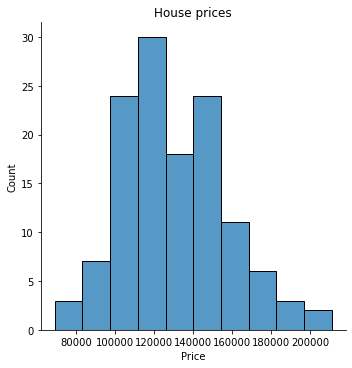

In [ ]:
# Uni-variate with histogram
sns.displot(data=hp, x="Price", kind="hist").set(title='House prices')
plt.show()

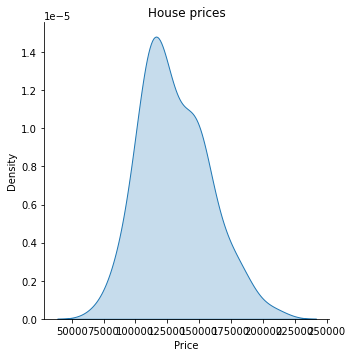

In [ ]:
# KDE
sns.displot(data=hp, x="Price", kind="kde", fill=True).set(title='House prices')
plt.show()

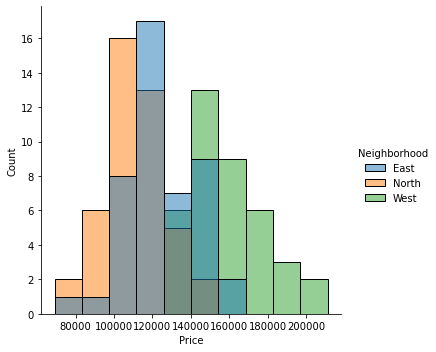

In [ ]:
# Histogram contitioned by other variable
sns.displot(data=hp, x="Price", hue="Neighborhood", kind="hist")
plt.show()

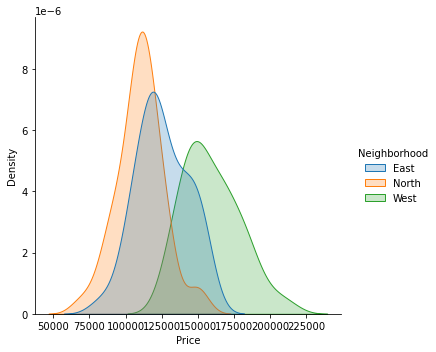

In [ ]:
# KDE contitioned by other variable
sns.displot(data=hp, x="Price", hue="Neighborhood", kind='kde', fill=True)
plt.show()

### Box plot / Violin plot

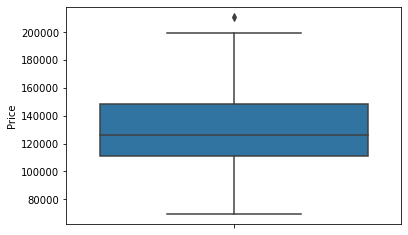

In [ ]:
sns.boxplot(data=hp, y='Price')
plt.show()

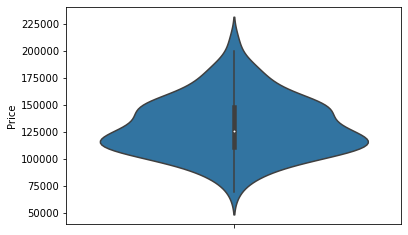

In [ ]:
sns.violinplot(data=hp, y='Price')
plt.show()

### Scatter Plot

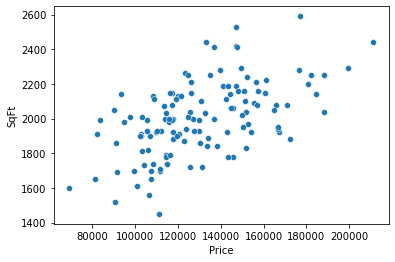

In [ ]:
sns.scatterplot(data=hp, x='Price', y='SqFt')
plt.show()

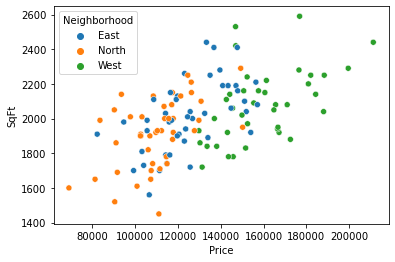

In [ ]:
sns.scatterplot(data=hp, x='Price', y='SqFt', hue='Neighborhood')
plt.show()

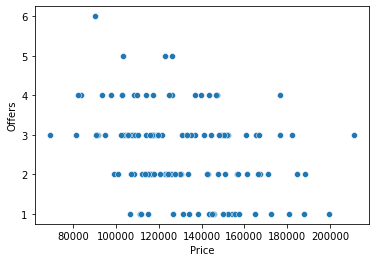

In [ ]:
sns.scatterplot(data=hp, x='Price', y='Offers')
plt.show()

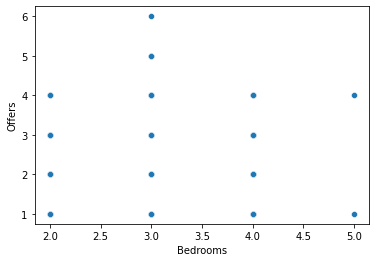

In [ ]:
sns.scatterplot(data=hp, x='Bedrooms', y='Offers')
plt.show()

### Correlation and Heatmaps

In [ ]:
cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
corr = hp[cols].corr(method='pearson')
corr

,Price,SqFt,Bedrooms,Bathrooms,Offers
Price,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000


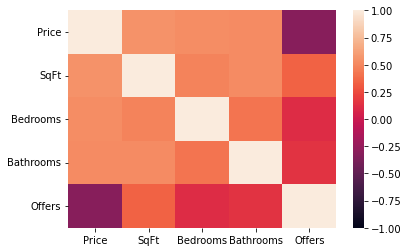

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1)
plt.show()